In [1]:
import pandas as pd
import Functions as fn
import matplotlib.pyplot as plt

In [2]:
#PREDICTION

In [3]:
# profilok betöltése
s_profiles, s_edges = fn.load_and_select_profiles_and_edges()
full_profiles, full_edges = fn.load_and_select_profiles_and_edges("Y")

#reindexálás
s_profiles.set_index("user_id", drop=False, inplace=True)
full_profiles.set_index("user_id", drop=False, inplace=True)

loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590
loading profiles
loading edges
1    2642113
2    1992414
Name: source, dtype: int64
Selected profiles: 695406
Nodes with edges: 434590


In [4]:
#gráf elkészítése
network = fn.create_graph_from_nodes_and_edges(s_profiles, s_edges)

In [5]:
#test id-k kiválogatása
test_set_id = s_profiles[
    s_profiles.TRAIN_TEST == 'TEST']["user_id"].values.tolist()

In [6]:
prediction = pd.DataFrame(test_set_id, columns=['user_id'])
prediction.set_index("user_id", drop=False, inplace=True)

In [7]:
original = full_profiles["gender"]

prediction["original"] = original

In [8]:
#becslés barátok aránya alapján
prediction["predicted_gender_neighbor"] = prediction.apply(
    lambda row: fn.predictor_neighbor(
        network, row['user_id'], s_profiles), axis=1)

In [9]:
#becslés triádok alapján
prediction["predicted_gender_triangle"] = prediction.apply(
    lambda row: fn.predictor_triangles(
        network, row['user_id'], s_profiles), axis=1)

In [10]:
#pontosság tesztelése
fn.acc_test(prediction)

accuracy with neighbors: 0.487075
 accuracy with triangles: 0.5036


In [11]:
#PLOTS

In [12]:
full_network = fn.create_graph_from_nodes_and_edges(full_profiles, full_edges)

In [13]:
edges_with_features = fn.add_node_features_to_edges(full_profiles, full_edges)

In [14]:
edges_with_features["type"] = edges_with_features.apply(
    lambda x: 1 if x["gender_y"] == x["gender_x"] else -1, axis=1)

male = pd.concat([fn.genderfilter(
    "MF", edges_with_features), fn.genderfilter("MM", edges_with_features)])

female = pd.concat([fn.genderfilter(
    "FF", edges_with_features), fn.genderfilter("FM", edges_with_features)])

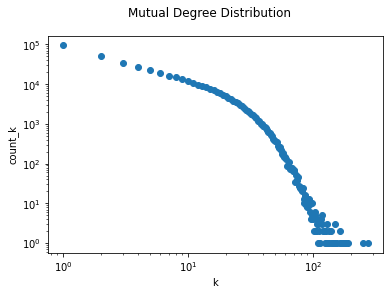

In [15]:
fn.plot_degree_distribution(full_network)

In [16]:
# A plot a node-ok fokszámát azok gyakoriságának függvényében ábrázolja.

# Az ábrából látható, hogy a emberek legnagyob része kevés ismerőssel rendelkezik,
# a legtöbb node fokszáma alacsony, viszont van pár ember aki a többiekhez képest
# nagyon sokkal(~100 nagyságrend), az eloszlás nem normális, vannak extrém, kiugró értékek.

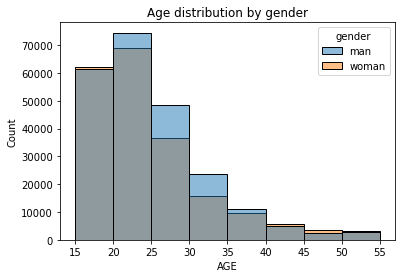

In [17]:
fn.plot_age_distribution_by_gender(full_profiles)

In [18]:
# A plot a nodeok életkorát azok gyakoriságának függvényében, nemek szerinti bontásban.

# Az adatbázisban 15-50 éves korig vannak megfigyelések, az ábrából látható, hogy
# a közödsségi portálok sokkal népszerűbbek a fiatalok körében, a férfiak vannak
# többségben a 20-40 éves korosztályban, efelett már a nők, ez az eloszlás társadalmi
# szinten is valamelyest megfigylehető.

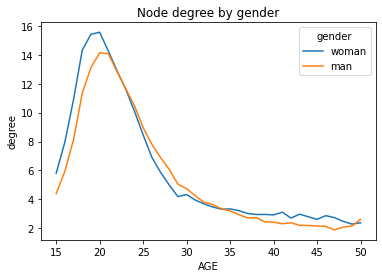

In [19]:
fn.plot_node_degree_by_gender(full_profiles, network)

In [20]:
# A plot a nodeok fokszámát az életkor szerint ábrázolja, nemek szerinti bontásban.

# Minimális különbség figyelhető meg az ismerősök számában a nemeket illetően,
# fiatalabb korban a nőknek általában több ismerősük van, azonban 35 éves korban
# változik a helyzet. Látható a korábban említett tény, hogy a fiatalok többségben
# vannak, általában az emberek hasonló korosztállyal ismerősök. Az idősek ismerősei
# feltehetően általában a gyerekeik és csak kevesebb idős ember.

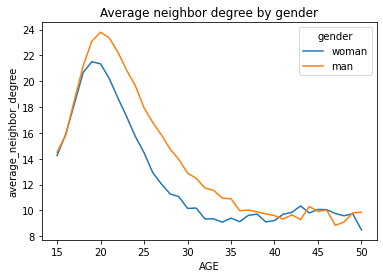

In [21]:
fn.plot_node_average_neighbor_degree_by_gender(full_profiles, network)

In [22]:
# A plot a nodeok szomszédainak átlagos fokszámát ábrázolja az életkor függvényében, nemek szerinti bontásban.

# 20 éves kor fölött a férfiak ismerőseinek átlagos fokszáma jelentősen a 
# nők fölött van, a hálózaton több a férfi felhasználó, általában azonos nemből több
# embert ismerünk, a baráti klikkekben is megfigyelhető női és férfi társaásgok.
# A fiatalok ismét többségen vannak, több fiatal van fent a hálózaton akik ismerik
# egymást, ezáltal a saját és ismerőseik átlagos fokszáma is nagyobb.

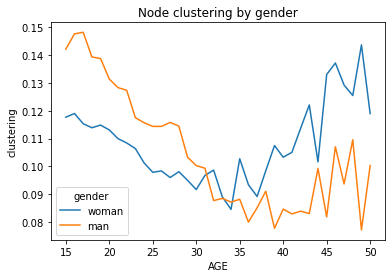

In [23]:
fn.plot_node_clustering_by_gender(full_profiles, network)

In [24]:
# A plot a nodeok klaszterezettségét ábrázolja az életkor függvényében, nemek szerinti bontásban.

# A korábban említett feltételezések jelenlétét mutatja az ábra, a klaszterek mutatják,
# hogy alacsonyabb korban nagyon magas, általában az osztályunkkal barátkozunk,
# ahol mindenki ismer mindenkit, majd ahogy dolgozni kezdünk ez a jelenség csökken.
# A férfiak fiatalabb korban többségben vannak, és jobban ismerik ismerőseik ismerőseit.
# A nagyobb férfi társaságok jelenlétére utal az ábra. Idős korban nő a klaszterezettség,
# ismerőseik száma kevesebb, és jobban ismerik egymást, azokkal az emberkekkel barátkozunk
# hosszabb távon, akikkel régebb óta ismerjük egymást, idősebbek kevésbé törekednek új
# barátságok alakítására és a kevés ismerősüket valószínűb, hogy bemutatják egymásnak hosszabb
# távon.
# Idősebb korban a nők klaszterezettsége nő, általában a gyerekeik barátainak szüleivel
# általában az anyák tartják a kapcsolatot, így a klaszterezettségük nő.

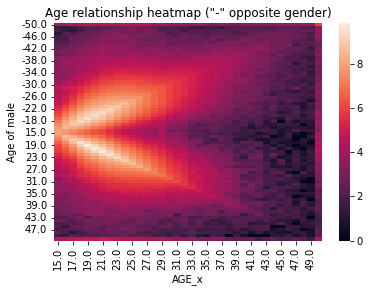

In [25]:
fn.plot_age_relations_heatmap_genderdiff(male, "Age of male")

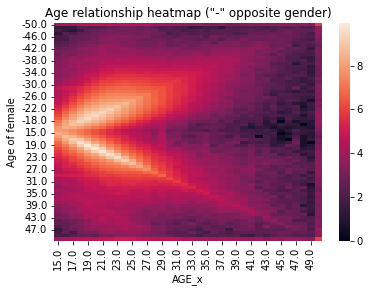

In [26]:
fn.plot_age_relations_heatmap_genderdiff(female, "Age of female")

In [27]:
# A plotok külön a férfiak és külön a nők kapcsolatait ábrázolja, kor szerinti bontásban, a negatív életkor azt jelzi, 
# hogy a kapcsolatban a másik személy ellenkező nemű.

# A felső 2 ábrát együtt érdemes értelmezni, az ábák ellenkező nemmű ismerőseinek
# része megyegyezik, különbséget az jelenti,hogy az elsőben a női-női, a másodikban a
# férfi-férfi kapcsolatok vannak kiszűrve. Mindkét ábrából átható, hogy leginkább 
# hasonló korú ismerőseink vannak, ami az idő előrehaladtával csökken. A nők gyakrabban
# ismerősek a fiatalabb nőkkel,a férfiak általában inkább a saját korsztályukkal
# ismerősök. A legtöbb ismerettség a fiatal korban jellemző, a fiatalok túslúyából
# adódóan, idősebb korban a férfi-férfi barátságok száma relatíve kevés, a férfiaknak
# idősebb korban csak kevés, feltehetőleg jó barátjuk van.

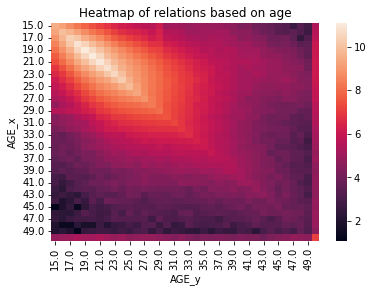

In [28]:
fn.plot_age_relations_heatmap(edges_with_features)

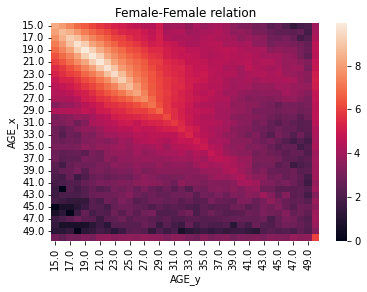

In [29]:
fn.plot_age_relations_heatmapv2(fn.genderfilter("FF", edges_with_features), "Female-Female relation")

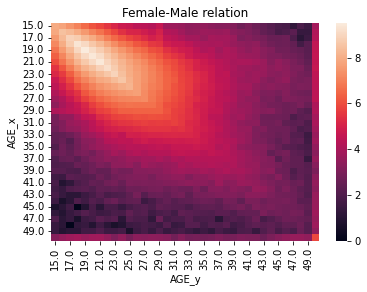

In [30]:
fn.plot_age_relations_heatmapv2(fn.genderfilter("MF", edges_with_features), "Female-Male relation")

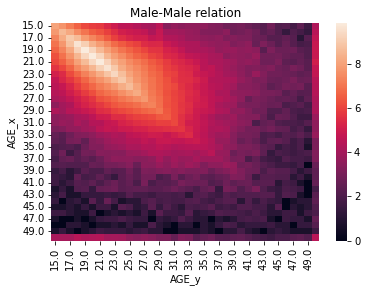

In [31]:
fn.plot_age_relations_heatmapv2(fn.genderfilter("MM", edges_with_features), "Male-Male relation")

In [32]:
# A heatmapek a különböző típusú kapcsolatok megoszlását az életkor szerinti bontásban ábrázolja, női-női, férfi-férfi típusú
# kapcsolatok megoszlása a két fél életkorának függvényében, az összes ilyen típusú kapcsolathoz viszonyítva.

# Összességében elmondható, hogy leginkább a hasonló korosztállyal vannak ismerősei az embereknek, 
# amely minden korcsoportban jellemző,a kapcsolatok többsége fiatalok között van. 
# Külön tekintve a férfi-férfi és női-női kapcsolatokat, látható, hogy a férfiak inkább ismerősök hasonló
# korú férfiakkal, a nők fiatalabb nőkkel gyakrabban ismerősök. A férfi-női kapcsoltokra kevésbé jellemző az, 
# hogy szigorúan hasonló korú ismerősök lennének,ezen kapcsolatok is fiatalabb korban a jellemzőbbek, 
# egyrészt abból adódik, hogy több a fiatal a mintában, másrészt szerepet játszhat a párkeresés is.
# Az anyák valószínűleg gyakrabban ismerősök a gyerekeikkel, a női-női és férfi-női heatmapeken is 
# gyakoribbak az erre utaló kapcsolatok.

In [33]:
profiles = fn.portion_separator(network, full_profiles.sample(n=30000), full_profiles)

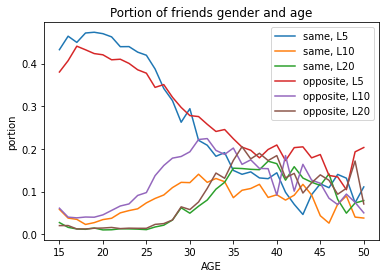

In [34]:
fn.portion_plot(profiles)

In [35]:
# A plot a nodeok szomszédainak megoszlását ábrázolja, az életkor függvényében, a görbéknél a same-opposite
# azt jelenti, hogy a kapcsolat azonos vagy ellenkező neművel jelenlévő kapcsolat, 
# az L5- 5 évnél kisebb a korkülönbség abszolút értéke
# L10- 10 évnél kisebb, 5 évnél nagyobb a korkülönbség abszolútértéke...

# Az utolsó ábrán látható annak megoszlása, hogy a különböző korokban milyen arányban
# vannak az adott nembe és korkülönbségbe tartozó ismerősök aránya. Fiatalabb korban
# lényegesen nagyobb részarányt képviselnek a hasonló korú ismerősök, ez egyrészt a 
# vizsgált korosztályból is adódik, a 15 évesek általában ismernek maguknál fiatalabb
# embereket, akik nem szerepelnek az elemzésben, ez igaz az idősebb korosztályra is, 
# másrészt 15 évesen nem nagyon lehet olyan ismerősünk, aki 20 évvel fiatalabb nálunk.
# Az idő előrehaladtával egyre több korosztályból ismerünk emberket.